In [9]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [10]:
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape
#train_data[0]

(25000,)

In [7]:
train_labels[0]

1

1

In [11]:
word_index = imdb.get_word_index()

In [12]:
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [13]:
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
for _ in train_data[0]:
  print(word_index.get(_ -3))

In [16]:
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] =1
    return results

In [17]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [38]:
from tqdm.keras import TqdmCallback
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20, 
                    batch_size=512, 
                    verbose = 0,
                    validation_data=(x_val,y_val),
                    callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

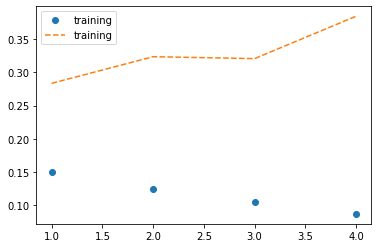

In [34]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values, 'o', label = 'training-loss_values')
plt.plot(epochs, val_loss_values, '--', label = 'training-val-loss_values')
plt.legend()
plt.show()

In [35]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4049 - accuracy: 0.8548


[0.40491703152656555, 0.8547599911689758]

In [ ]:
history_dict

Modelo menos complejo

In [42]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape = (10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)

from tqdm.keras import TqdmCallback
history2 = model2.fit(partial_x_train,partial_y_train,
                    epochs=20, 
                    batch_size=512, 
                    verbose = 0,
                    validation_data=(x_val,y_val),
                    callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

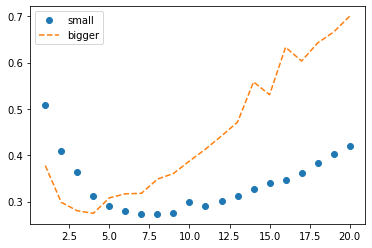

In [41]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']

epochs = range(1,len(loss_values)+1)
plt.plot(epochs, val_loss_values_2, 'o', label = 'small')
plt.plot(epochs, val_loss_values, '--', label = 'bigger')
plt.legend()
plt.show()

Regularización

In [43]:
from keras import regularizers

In [53]:
from tqdm.keras import TqdmCallback
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape = (10000,),
                        kernel_regularizer= regularizers.l2(0.0001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)

history3 = model3.fit(partial_x_train,partial_y_train,
                    epochs=20, 
                    batch_size=512, 
                    verbose = 0,
                    validation_data=(x_val,y_val),
                    callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

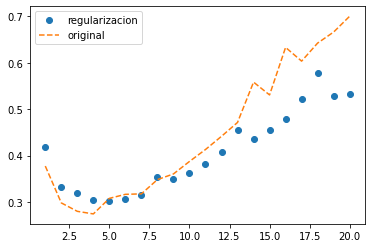

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_3 = history3.history['val_loss']

epochs = range(1,len(loss_values)+1)
plt.plot(epochs, val_loss_values_3, 'o', label = 'regularizacion')
plt.plot(epochs, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

DROPOUT

In [57]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu',))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)

history4 = model4.fit(partial_x_train,partial_y_train,
                    epochs=20, 
                    batch_size=512, 
                    verbose = 0,
                    validation_data=(x_val,y_val),
                    callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

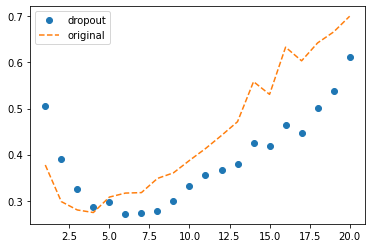

In [58]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_4 = history4.history['val_loss']

epochs = range(1,len(loss_values)+1)
plt.plot(epochs, val_loss_values_4, 'o', label = 'dropout')
plt.plot(epochs, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()